In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson
from iminuit import Minuit
from iminuit.cost import LeastSquares
import math
import matplotlib.patches as patches

In [16]:
#resistenza, capacità e frequenza di taglio attesa
R = 6742 #Ohm
C = 1.690*10**(-9) #F
F0exp = 1/(R*C*2*np.pi)
print("la frequenza di taglio attesa è {} Hz".format(F0exp))

la frequenza di taglio attesa è 13968.336182079953 Hz


In [19]:
#Dati resistore

#frequenze
Fr = np.array([1000, 5000, 10000, 12000, 15000, 20000, 25000, 50000, 75000, 100000, 200000])

#V in entrata
errVinr = np.array([5,5,5,5,5,5,5,5,5,5,5]) * (2/25)
Vinr =  np.array([5.4,5.6,5.6,5.6,5.6,5.6,5.6,5.6,5.6,5.6,5.6])

#V in uscita
errVoutr = np.array([0.5,1,2,2,5,5,5,5,5,5,5]) * (2/25)
Voutr = np.array([0.420, 1.84,3.12,3.48,4.10,4.5,4.7,5.1,5.2,5.2,5.3])

#Attenuazione
Ar = Voutr/Vinr
errAr = Ar*np.sqrt((errVinr/Vinr)**2+(errVoutr/Voutr)**2)


In [21]:
#Dati capacitore

#frequenze
Fc = np.array([1000, 5000, 10000, 12000, 15000, 20000, 25000, 50000, 75000, 100000, 200000])

#V in entrata
errVinc = np.array([5,5,5,5,5,5,5,5,5,5,5]) * (2/25)
Vinc = np.array([5.4, 5.6, 5.6, 5.6, 5.6, 5.6, 5.6, 5.6, 5.5, 5.6, 5.6])

#V in uscita
errVoutc = np.array([5,5,5,5,5,2,2,1,1,0.5,0.5]) * (2/25)
Voutc = np.array([5.4, 5.3, 4.5, 4.3, 3.8, 3.08, 2.64, 1.48, 1.02, 0.77, 0.41])

#Attenuazione
Ac = Voutc/Vinc
errAc = Ac*np.sqrt((errVinc/Vinc)**2+(errVoutc/Voutc)**2)


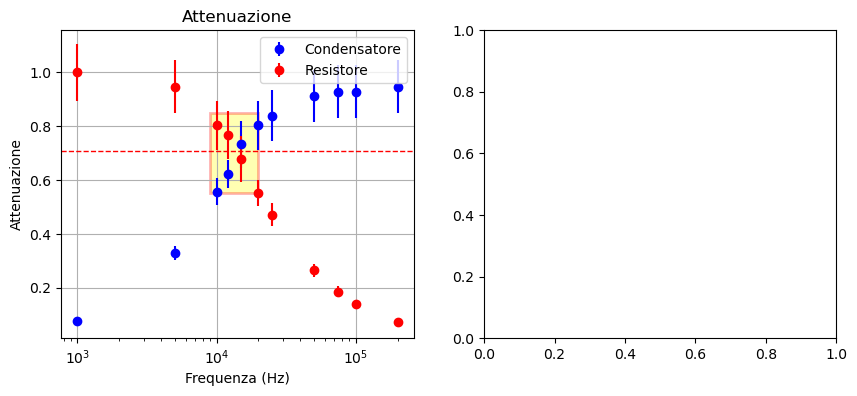

In [23]:
#Grafico
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

#Attenuazione
axes[0].errorbar(Fr, Ar, yerr = errAr, label='Condensatore', color='blue', fmt = 'o')
axes[0].errorbar(Fc, Ac, yerr = errAc, label='Resistore', color='red', fmt = 'o')
axes[0].set_title('Attenuazione')
axes[0].legend()
axes[0].set_xscale('log')
axes[0].grid(True)
axes[0].set_xlabel("Frequenza (Hz)")
axes[0].set_ylabel("Attenuazione")
axes[0].axhline(y=1/np.sqrt(2), color='red', linestyle='--', linewidth=1)

#Rettangolo per evidenziare i dati di fit
rect = patches.Rectangle(
    (9000, 0.55),          # angolo inferiore sinistro (x, y)
    20000 - 9000,          # larghezza
    0.8 - 0.5,             # altezza
    linewidth=2,
    edgecolor='red',
    facecolor='yellow',
    alpha=0.3              # trasparenza
)
axes[0].add_patch(rect)



In [35]:
#Fit attenuazione resistore
i = 3
f = 7
def ret(x,a,b):
    return(a*x+b)
least_squares_r = LeastSquares(Fr[i:f], Ar[i:f], errAr[i:f], ret)
mr = Minuit(least_squares_r, a = 1/25000  , b = 1 )
mr.migrad()
mr.minos()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.4755 (χ²/ndof = 0.2)     │              Nfcn = 65               │
│ EDM = 3.94e-22 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   18e-6   │   8e-6    │   -8e-6    │    8e-6    │         │         │       │
│ 1 │ b    │   0.42    │   0.13    │   -0.13    │    0.13    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │           a           │           b           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -8e-6   │   8e-6    │   -0.13   │   0.13    │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌───┬───────────────────────┐
│   │          a          b │
├───┼───────────────────────┤
│ a │   5.85e-11 -932.25e-9 │
│ b │ -932.25e-9     0.0162 │
└───┴───────────────────────┘

In [37]:
#Fit condensatore

least_squares_c = LeastSquares(Fc[i:f], Ac[i:f], errAc[i:f], ret)
mc = Minuit(least_squares_c, a = -1/25000 , b = 1 )
mc.migrad()
mc.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.2924 (χ²/ndof = 0.1)     │              Nfcn = 66               │
│ EDM = 1.62e-18 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  -22e-6   │   7e-6    │   -7e-6    │    7e-6    │         │         │       │
│ 1 │ b    │   1.00    │   0.14    │   -0.14    │    0.14    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │           a           │           b           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -7e-6   │   7e-6    │   -0.14   │   0.14    │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌───┬───────────────────────┐
│   │          a          b │
├───┼───────────────────────┤
│ a │   4.28e-11 -888.00e-9 │
│ b │ -888.00e-9     0.0193 │
└───┴───────────────────────┘

(10800.0, 27500.000000000004)


Text(0, 0.5, 'Attenuazione')

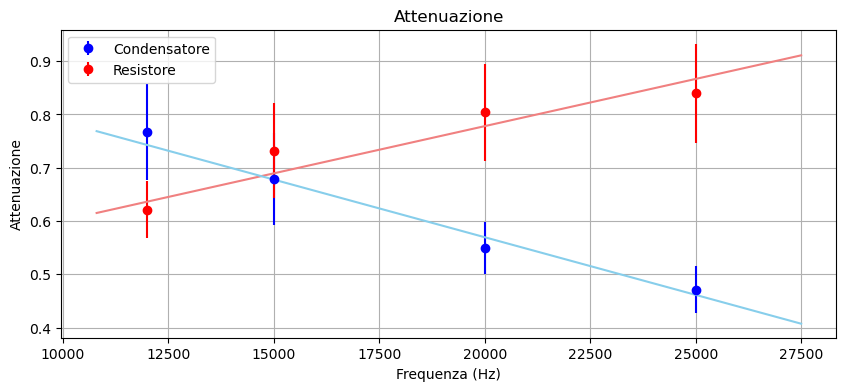

In [54]:
#Grafico per l'intersezione delle rette

fi, ax = plt.subplots(figsize=(10, 4))
p = (min(Fc[i:f].min(),Fr[i:f].min())*0.9,max(Fc[i:f].max(),Fr[i:f].max())*1.1)
print((min(Fc[i:f].min(),Fr[i:f].min())*0.9,max(Fc[i:f].max(),Fr[i:f].max())*1.1))

#attenuazione
ax.errorbar(Fc[i:f], Ac[i:f], yerr=errAc[i:f], label='Condensatore', color='blue', fmt = 'o' )
ax.errorbar(Fr[i:f], Ar[i:f], yerr=errAr[i:f], label='Resistore', color='red', fmt = 'o')
ax.set_title('Attenuazione')
ax.legend()
ax.grid(True)
ax.plot(np.array(p),ret(np.array(p), mr.values['a'], mr.values['b']), color = 'lightcoral', label = 'fit resistore')
ax.plot(np.array(p),ret(np.array(p), mc.values['a'], mc.values['b']), color = 'skyblue', label = 'fit condensatore')
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Attenuazione")

In [44]:
#Risultati
vt = (mr.values['b']-mc.values['b'])/(mc.values['a']-mr.values['a'])

e_a_res = mr.errors['a']
e_a_cond = mc.errors['a']
e_b_res = mr.errors['b']
e_b_cond = mc.errors['b']
cov_res = mr.covariance[('a', 'b')]
cov_cond = mc.covariance[('a', 'b')]


delfina = (((mr.values['b']-mc.values['b'])/((mc.values['a']-mr.values['a'])**2))**2)*(e_a_res**2+e_a_cond**2)
diego = ((1/(mc.values['a']-mr.values['a']))**2)*(e_b_res**2+e_b_cond**2)
claudio = 2*((mr.values['b']-mc.values['b'])/((mc.values['a']-mr.values['a'])**3))*(cov_res+cov_cond)

errvt = (delfina + diego + claudio)**0.5
print("La frequenza stimata è {} +/- {} Hz".format(vt, errvt))

#test di consistenza

test = abs((vt - F0exp)/(errvt)) 
print("Consistente con Fexp entro {} sigma".format(test))

La frequenza stimata è 14701.659280675933 +/- 1584.4474277967522 Hz
Consistente con Fexp entro 0.462825768612405 sigma


(10800.0, 27500.000000000004)


Text(0, 0.5, 'Attenuazione')

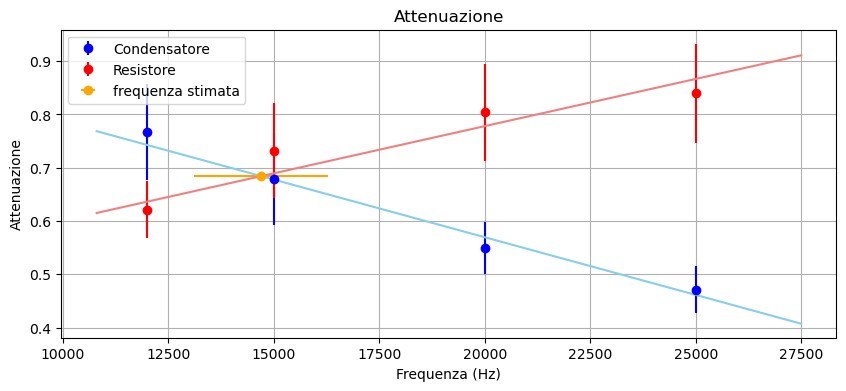

In [58]:
#Grafico per l'intersezione delle rette

fi1, ax1 = plt.subplots(figsize=(10, 4))
p = (min(Fc[i:f].min(),Fr[i:f].min())*0.9,max(Fc[i:f].max(),Fr[i:f].max())*1.1)
print((min(Fc[i:f].min(),Fr[i:f].min())*0.9,max(Fc[i:f].max(),Fr[i:f].max())*1.1))

#attenuazione
ax1.errorbar(Fc[i:f], Ac[i:f], yerr=errAc[i:f], label='Condensatore', color='blue', fmt = 'o' )
ax1.errorbar(Fr[i:f], Ar[i:f], yerr=errAr[i:f], label='Resistore', color='red', fmt = 'o')
ax1.errorbar(vt,ret(vt, mr.values['a'], mr.values['b']), xerr=errvt, label = Frequenza stimata", fmt = 'o', color = 'orange')
ax1.set_title('Attenuazione')
ax1.legend()
ax1.grid(True)
ax1.plot(np.array(p),ret(np.array(p), mr.values['a'], mr.values['b']), color = 'lightcoral', label = 'fit resistore')
ax1.plot(np.array(p),ret(np.array(p), mc.values['a'], mc.values['b']), color = 'skyblue', label = 'fit condensatore')
ax1.set_xlabel("Frequenza (Hz)")
ax1.set_ylabel("Attenuazione")
